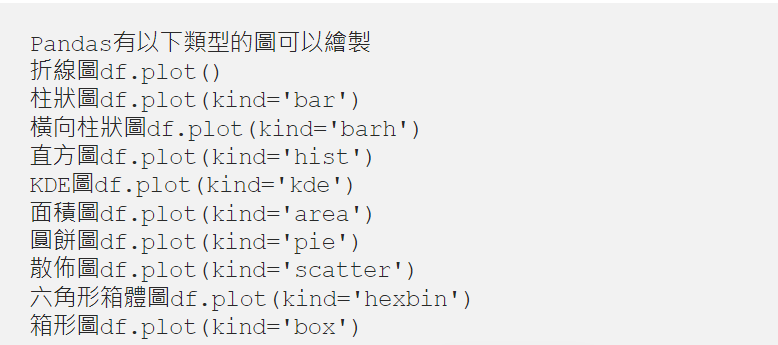

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
data=pd.read_csv("googleplaystore.csv",header=0)
df=data.copy()
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [10]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [11]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [12]:
df["Rating"]=df["Rating"].fillna(value=df["Rating"].mean())

In [13]:
# 把一個莫名其妙的資料，以攏統的"TOOLS"取代

df.loc[df["Category"]=="1.9",["Category"]]="TOOLS"

In [14]:
df["Category"].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   844
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

In [15]:
# 把一個莫名其妙的資料，以"Free"取代
df.loc[df["Type"]=="0",["Type"]]="Free"
df["Type"].value_counts()

Free    10040
Paid      800
Name: Type, dtype: int64

In [16]:
df.loc[df["Price"]=="Everyone",["Price"]]="0"
df["Price"]=df["Price"].str.replace("$","")
df["Price"]=df["Price"].astype("float")
df["Price"]

C:\Users\dream\.conda\envs\ai37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10836    0.0
10837    0.0
10838    0.0
10839    0.0
10840    0.0
Name: Price, Length: 10841, dtype: float64

In [17]:
categorylist=df["Category"].value_counts().index
categorylist

Index(['FAMILY', 'GAME', 'TOOLS', 'MEDICAL', 'BUSINESS', 'PRODUCTIVITY',
       'PERSONALIZATION', 'COMMUNICATION', 'SPORTS', 'LIFESTYLE', 'FINANCE',
       'HEALTH_AND_FITNESS', 'PHOTOGRAPHY', 'SOCIAL', 'NEWS_AND_MAGAZINES',
       'SHOPPING', 'TRAVEL_AND_LOCAL', 'DATING', 'BOOKS_AND_REFERENCE',
       'VIDEO_PLAYERS', 'EDUCATION', 'ENTERTAINMENT', 'MAPS_AND_NAVIGATION',
       'FOOD_AND_DRINK', 'HOUSE_AND_HOME', 'AUTO_AND_VEHICLES',
       'LIBRARIES_AND_DEMO', 'WEATHER', 'ART_AND_DESIGN', 'EVENTS',
       'PARENTING', 'COMICS', 'BEAUTY'],
      dtype='object')

In [18]:
df['pricelist'] = pd.cut(df['Price'], [0.99,10,20,150,300,400], labels=['<=10',"11-20",'21-150',"150-300","301-400"])
pricelist = df.groupby(['pricelist', 'Category']).agg({'App':'count'})
# pricedf=df.pivot_table(index="Category",columns="pricelist",values="App",aggfunc="count")
pricelist

App
pricelist Category                
<=10      ART_AND_DESIGN         3
          AUTO_AND_VEHICLES      3
          BEAUTY                 0
          BOOKS_AND_REFERENCE   24
          BUSINESS               9
...                            ...
301-400   SPORTS                 0
          TOOLS                  0
          TRAVEL_AND_LOCAL       0
          VIDEO_PLAYERS          0
          WEATHER                0

[165 rows x 1 columns]

pricelist,<=10,11-20,21-150,150-300,301-400
Category,,,,,
ART_AND_DESIGN,3,0,0,0,0
AUTO_AND_VEHICLES,3,0,0,0,0
BEAUTY,0,0,0,0,0
BOOKS_AND_REFERENCE,24,0,0,0,0
BUSINESS,9,3,1,0,0
COMICS,0,0,0,0,0
COMMUNICATION,19,1,0,0,0
DATING,7,0,0,0,0
EDUCATION,4,0,0,0,0


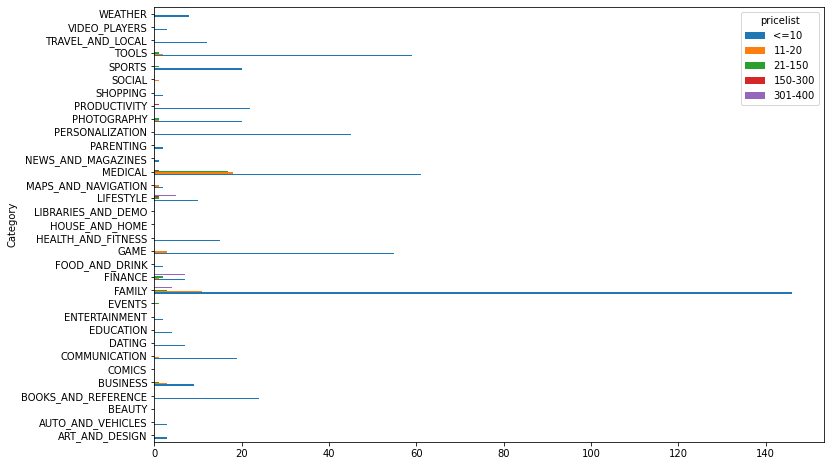

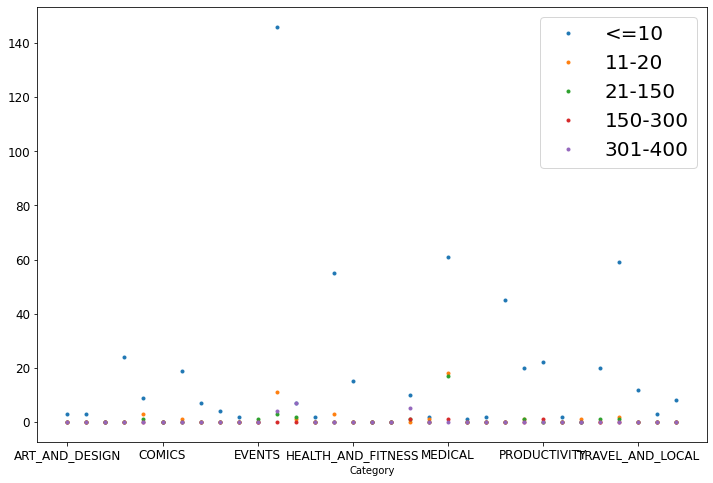

In [19]:
pricedf=df.pivot_table(index="Category",columns="pricelist",values="App",aggfunc="count")
pricedf.plot(kind="barh",figsize=(12,8),label="Category")
pricedf.plot(style=".",figsize=(12,8),label="Category")

plt.tick_params(axis="both",labelsize=12)
plt.legend(fontsize=20, loc='upper right')
pricedf